## 2024机器智能 实验四

In [1]:
# File: 2024机器智能实验04_teacher.ipynb
# License: MIT License 
# Copyright: (c) 2024 Rongxi Li <lirx67@mail2.sysu.edu.cn> 
# Created: 2024-03-10
# Brief: 2024机器智能实验课教师版——实验四

### 必要依赖

In [2]:
!pip install --upgrade ipympl
!pip install numpy 
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
%matplotlib ipympl

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### PSO

画图函数，不用看

In [5]:
class PlotPSO2D:
    def __call__(self, pop_list, decode, get_fitn, num=None):
        boundary = decode(np.array([[0, 0], [1, 1]]))
        x = np.linspace(boundary[0][0], boundary[1][0], 100)
        y = np.linspace(boundary[0][1], boundary[1][1], 100)
        X, Y = np.meshgrid(x, y)
        Z = get_fitn(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)

        self.fig, self.ax = plt.subplots(num=num)
        self.ax.cla()

        def _update(frame):
            idx = frame % len(pop_list)
            pop = pop_list[idx]
            pop = decode(pop)
            self.ax.cla()
            self.ax.contourf(X, Y, Z, 10, cmap="Greys", alpha=0.2)
            C = self.ax.contour(X, Y, Z, 10, alpha=1, cmap="YlGnBu")
            self.ax.clabel(C, inline=True, fontsize=10)

            self.ax.set_xlim(boundary[0][0], boundary[1][0])
            self.ax.set_ylim(boundary[0][1], boundary[1][1])
            self.ax.scatter(pop[:, 0], pop[:, 1], c="r", s=10)

            self.ax.set_xlabel("x")
            self.ax.set_ylabel("y")
            self.ax.set_title("PSO")

        self.ani = animation.FuncAnimation(
            self.fig, _update, frames=len(pop_list), interval=100, repeat=False
        )
        plt.show(self.ani)

#### 4.1 请完成PSO算法

包括获取个体最优、获取全局最优、获取速度三个功能以及PSO的主要流程。

In [6]:
def get_pbest(pop, fit, pbest, pbest_fit):
    """获取个体最优

    Args:
        pop (numpy.ndarray): 粒子群，二维数组，[pn, dim]
        fit (numpy.ndarray): 适应度，一维数组，[pn]
        pbest (numpy.ndarray): 上一次迭代的个体最优，二维数组，[pn, dim]
        pbest_fit (numpy.ndarray): 上一次迭代的个体最优适应度，一维数组，[pn]

    Returns:
        numpy.ndarray: 个体最优，二维数组，[pn, dim]
        numpy.ndarray: 个体最优适应度，一维数组，[pn]
    """
    # TODO 更新个体最优
    return pbest, pbest_fit

In [7]:
## 答案
def get_pbest(pop, fit, pbest, pbest_fit):
    """获取个体最优

    Args:
        pop (numpy.ndarray): 粒子群，二维数组，[pn, dim]
        fit (numpy.ndarray): 适应度，一维数组，[pn]
        pbest (numpy.ndarray): 上一次迭代的个体最优，二维数组，[pn, dim]
        pbest_fit (numpy.ndarray): 上一次迭代的个体最优适应度，一维数组，[pn]

    Returns:
        numpy.ndarray: 个体最优，二维数组，[pn, dim]
        numpy.ndarray: 个体最优适应度，一维数组，[pn]
    """
    update = fit < pbest_fit
    pbest[update] = pop[update]
    pbest_fit[update] = fit[update]
    return pbest, pbest_fit

In [8]:
def get_gbest(pop, fit, gbest, gbest_fit):
    """获取全局最优

    Args:
        pop (numpy.ndarray): 粒子群，二维数组，[pn, dim]
        fit (numpy.ndarray): 适应度，一维数组，[pn]
        gbest (numpy.ndarray): 上一次迭代的全局最优，一维数组，[dim]
        gbest_fit (float): 上一次迭代的全局最优适应度

    Returns:
        numpy.ndarray: 全局最优，一维数组，[dim]
        float: 全局最优适应度
    """
    # TODO 更新全局最优
    return gbest, gbest_fit

In [9]:
## 答案
def get_gbest(pop, fit, gbest, gbest_fit):
    """获取全局最优

    Args:
        pop (numpy.ndarray): 粒子群，二维数组，[pn, dim]
        fit (numpy.ndarray): 适应度，一维数组，[pn]
        gbest (numpy.ndarray): 上一次迭代的全局最优，一维数组，[dim]
        gbest_fit (float): 上一次迭代的全局最优适应度

    Returns:
        numpy.ndarray: 全局最优，一维数组，[dim]
        float: 全局最优适应度
    """
    idx = np.argmin(fit)
    if fit[idx] < gbest_fit:
        gbest = pop[idx]
        gbest_fit = fit[idx]
    return gbest, gbest_fit

In [10]:
def get_velocity(pop, velocity, pbest, gbest, omega, c1, c2):
    """获取速度

    Args:
        pop (numpy.ndarray): 粒子群，二维数组，[pn, dim]
        velocity (numpy.ndarray): 上此次迭代的速度，二维数组，[pn, dim]
        pbest (numpy.ndarray): 个体最优，二维数组，[pn, dim]
        gbest (numpy.ndarray): 全局最优，一维数组，[dim]
        omega (float): 惯性权重
        c1 (float): 局部加速系数
        c2 (flaot): 全局加速系数

    Returns:
        numpy.ndarray: 速度，二维数组，[pn, dim]
    """
    # TODO 更新速度
    return velocity

In [11]:
## 答案
def get_velocity(pop, velocity, pbest, gbest, omega, c1, c2):
    """获取速度

    Args:
        pop (numpy.ndarray): 粒子群，二维数组，[pn, dim]
        velocity (numpy.ndarray): 上此次迭代的速度，二维数组，[pn, dim]
        pbest (numpy.ndarray): 个体最优，二维数组，[pn, dim]
        gbest (numpy.ndarray): 全局最优，一维数组，[dim]
        omega (float): 惯性权重
        c1 (float): 局部加速系数
        c2 (flaot): 全局加速系数

    Returns:
        numpy.ndarray: 速度，二维数组，[pn, dim]
    """
    velocity = (
        omega * velocity
        + c1 * np.random.rand() * (pbest - pop)
        + c2 * np.random.rand() * (gbest - pop)
    )
    return velocity

In [12]:
def get_decoder(boundary):
    """获取解码函数

    Args:
        boundary (numpy.ndarray): 各维度的边界。
                二维数组，[dim, 2]，
                当输入一维数组时将自动扩展，此时各维度的边界相同。

    Returns:
        FunctionType: 解码函数
    """
    assert (len(boundary.shape) in [1, 2], "boundary shape error")

    def _inner(data):
        """解码函数

        Args:
            data (numpy.ndarray): 待解码数据，二维数组，[pn, dim]

        Returns:
            numpy.ndarray: 解码后数据，二维数组，[pn, dim]
        """
        assert (len(data.shape) in [1, 2], "data shape error")
        nonlocal boundary
        if len(boundary.shape) == 1:
            boundary = np.repeat(
                np.expand_dims(boundary, 0), repeats=data.shape[1], axis=0
            )
        ret = np.expand_dims(boundary[:, 0], axis=-1) + data.transpose(
            1, 0
        ) * np.expand_dims(boundary[:, 1] - boundary[:, 0], axis=-1)
        return ret.transpose(1, 0)

    return _inner

<>:12: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:23: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:12: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:23: SyntaxWarning: assertion is always true, perhaps remove parentheses?
C:\Users\jungh\AppData\Local\Temp\ipykernel_29664\4251106477.py:12: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (len(boundary.shape) in [1, 2], "boundary shape error")
C:\Users\jungh\AppData\Local\Temp\ipykernel_29664\4251106477.py:23: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (len(data.shape) in [1, 2], "data shape error")


In [13]:
def get_fitn_demo(pop):
    """获取适应度

    Args:
        pop (numpy.ndarray): 粒子群，二维数组，[pn, dim]

    Returns:
        numpy.ndarray: 适应度，一维数组，[pn]
    """
    x = pop[:, 0]
    y = pop[:, 1]
    return np.sin(np.sqrt(x**2 + y**2))

In [33]:
def pso(pn, dim, omega, c1, c2, max_iter, decode, get_fitn):
    """粒子群优化

    Args:
        pn (int): 粒子数量
        dim (int): 粒子维度
        omega (float): 惯性权重
        c1 (float): 局部加速系数
        c2 (float): 全局加速系数
        max_iter (int): 最大迭代次数
        decode (FunctionType): 解码函数
        get_fitn (FunctionType): 适应度函数

    Returns:
        numpy.ndarray: 全局最优，一维数组，[dim]
        float: 全局最优适应度
        List: 粒子群迭代过程
    """
    # 初始化粒子，速度，局部最优，全局最优等
    pop = np.random.rand(pn, dim)
    pop_list = [pop.copy()]
    gbest = None # 请修改
    gbest_fit = None # 请修改
    # ...

    for iter in range(max_iter):
        # 计算适应度
        # ...
        # 计算局部最优，全局最优
        # ...
        # 计算速度并更新粒子位置
        # ...
        pop_list.append(pop.copy())

    return gbest, gbest_fit, pop_list

In [14]:
## 答案
def pso(pn, dim, omega, c1, c2, max_iter, decode, get_fitn):
    """粒子群优化

    Args:
        pn (int): 粒子数量
        dim (int): 粒子维度
        omega (float): 惯性权重
        c1 (float): 局部加速系数
        c2 (float): 全局加速系数
        max_iter (int): 最大迭代次数
        decode (FunctionType): 解码函数
        get_fitn (FunctionType): 适应度函数

    Returns:
        numpy.ndarray: 全局最优，一维数组，[dim]
        float: 全局最优适应度
        List: 粒子群迭代过程
    """
    pop = np.random.rand(pn, dim)
    pbest = pop
    pbest_fit = get_fitn(decode(pop))
    gbest = pbest[np.argmin(pbest_fit)]
    gbest_fit = np.max(pbest_fit)
    velocity = np.zeros((pn, dim))
    pop_list = [pop.copy()]

    for iter in range(max_iter):
        fitness = get_fitn(decode(pop))
        pbest, pbest_fit = get_pbest(pop, fitness, pbest, pbest_fit)
        gbest, gbest_fit = get_gbest(pop, fitness, gbest, gbest_fit)
        velocity = get_velocity(pop, velocity, pbest, gbest, omega, c1, c2)
        pop += velocity
        pop_list.append(pop.copy())

    return gbest, gbest_fit, pop_list

In [15]:
def get_fitn_demo(pop):
    """获取适应度

    Args:
        pop (numpy.ndarray): 粒子群，二维数组，[pn, dim]

    Returns:
        numpy.ndarray: 适应度，一维数组，[pn]
    """
    x = pop[:, 0]
    y = pop[:, 1]
    return np.sin(np.sqrt(x**2 + y**2))

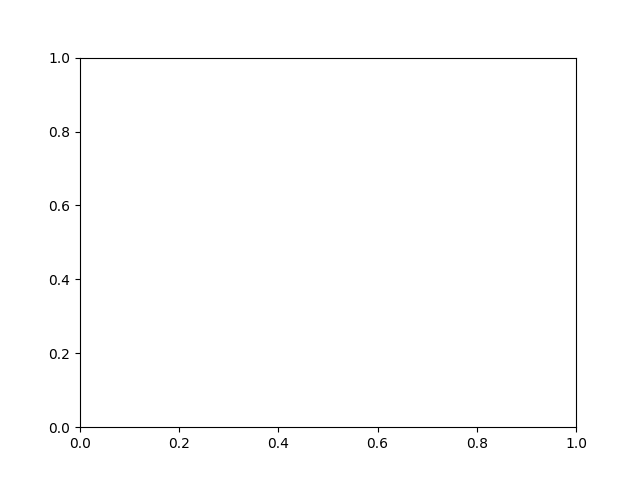

In [20]:
_, _, pop_list = pso(
    20,
    2,
    0.1,
    0.2,
    0.2,
    100,
    get_decoder(np.array([-1, 1])),
    get_fitn_demo,
)
PlotPSO2D()(pop_list, get_decoder(np.array([-1, 1])), get_fitn_demo)

#### 4.2 PSO求解极值

$\min{f(x,y)=x^2+y^2+25(\sin(x)^2+\sin(y)^2)}$

其中：

$-5\le x,y \le 5$



In [17]:
## 答案
def get_fitn(pop):
    x = pop[:, 0]
    y = pop[:, 1]
    return x**2 + y**2 + 25 * (np.sin(x) ** 2 + np.sin(y) ** 2)

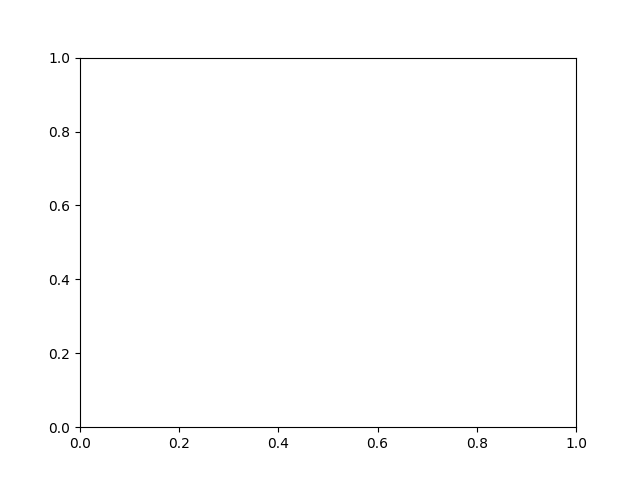

In [21]:
## 答案
_, _, pop_list = pso(
    20,
    2,
    0.1,
    0.2,
    0.2,
    100,
    get_decoder(np.array([-5, 5])),
    get_fitn,
)
PlotPSO2D()(pop_list, get_decoder(np.array([-5, 5])), get_fitn)

### ACO

In [ ]:
#### 4.3 蚁群算法

请用蚁群算法求解旅行商问题（TSP）。

In [31]:
class PlotTSP:
    def __call__(self, points, paths, num):
        self.fig, self.ax = plt.subplots(num=num)
        self.ax.cla()
    
        def _update(frame):
            idx = frame % len(paths)
            path = paths[idx]
            self.ax.cla()
    
            self.ax.set_xlim(0, 1)
            self.ax.set_ylim(0, 1)
            _path = np.concatenate([path, path[:, 0:1]], axis=1)
            for i in range(path.shape[0]):
                self.ax.plot(points[_path[i, :], 0], points[_path[i, :], 1], alpha=0.6, ls=":")
            self.ax.scatter(points[:, 0], points[:, 1], c="r")
    
        self.ani = animation.FuncAnimation(
            self.fig, _update, frames=len(paths), interval=10, repeat=False
        )
        plt.show(self.ani)

In [23]:
def TSPGenerator(point_size):
    """生成TSP问题的点集和距离矩阵

    Args:
        point_size (int): 点的数量

    Returns:
        numpy.ndarray: 点集，二维数组，[point_size, 2]
        numpy.ndarray: 距离矩阵，二维数组，[point_size, point_size]
    """
    points = np.random.rand(point_size, 2)
    distance = np.zeros((point_size, point_size))
    for i in range(point_size):
        for j in range(point_size):
            distance[i, j] = np.linalg.norm(points[i] - points[j])
    return points, distance

In [ ]:
def get_cost(ant_path, distance):
    """获取蚁群路径成本

    Args:
        ant_path (numpy.ndarray): 蚁群路径，二维数组，[ant_count, point_size]
        distance (numpy.ndarray): 距离矩阵，二维数组，[point_size, point_size]

    Returns:
        numpy.ndarray: 蚁群路径成本，一维数组，[ant_count]
    """
    ant_cost = None # 请修改
    return ant_cost

In [24]:
## 答案
def get_cost(ant_path, distance):
    """获取蚁群路径成本

    Args:
        ant_path (numpy.ndarray): 蚁群路径，二维数组，[ant_count, point_size]
        distance (numpy.ndarray): 距离矩阵，二维数组，[point_size, point_size]

    Returns:
        numpy.ndarray: 蚁群路径成本，一维数组，[ant_count]
    """
    _ant_path = np.roll(ant_path, -1, axis=1)
    ant_cost = np.sum(distance[ant_path, _ant_path], axis=1)
    return ant_cost

In [ ]:
def roulette(probabilities):
    """轮盘赌选择

    Args:
        probabilities (numpy.ndarray): 概率，二维数组，[ant_count, point_size]

    Returns:
        numpy.ndarray: 选择节点idx，一维数组，[ant_count]
    """
    ret = None # 请修改
    return ret

In [25]:
def roulette(probabilities):
    """轮盘赌选择

    Args:
        probabilities (numpy.ndarray): 概率，二维数组，[ant_count, point_size]

    Returns:
        numpy.ndarray: 选择节点idx，一维数组，[ant_count]
    """
    ant_count, point_size = probabilities.shape
    return np.vectorize(np.random.choice, signature="(n),(n)->()")(
        np.arange(point_size)[None, :].repeat(ant_count, axis=0),
        p=probabilities,
    )

In [ ]:
def random_ant_paths(ant_count, point_size):
    """初始化蚁群路径

    Args:
        ant_count (int): 蚂蚁数量
        point_size (int): 点的数量

    Returns:
        numpy.ndarray: 蚁群路径，二维数组，[ant_count, point_size]
    """
    ant_path = None # 请修改
    return ant_path

In [26]:
## 答案
def random_ant_paths(ant_count, point_size):
    """初始化蚁群路径

    Args:
        ant_count (int): 蚂蚁数量
        point_size (int): 点的数量

    Returns:
        numpy.ndarray: 蚁群路径，二维数组，[ant_count, point_size]
    """
    ant_path = np.arange(point_size)[None, :].repeat(ant_count, axis=0)
    for i in range(ant_count):
        np.random.shuffle(ant_path[i, :])
    return ant_path

In [ ]:
def get_ant_path(ant_path_start, tao, distance, alpha, beta):
    """获取蚁群路径

    Args:
        ant_path_start (numpy.ndarray): 蚁群路径起点，一维数组，[ant_count]
        tao (numpy.ndarray): 信息素浓度，二维数组，[point_size, point_size]
        distance (numpy.ndarray): 距离矩阵，二维数组，[point_size, point_size]
        alpha (float): 信息度因子
        beta (float): 启发函数因子

    Returns:
        numpy.ndarray: 蚁群路径，二维数组，[ant_count, point_size]
    """
    ant_path = None # 请修改
    return ant_path

In [27]:
## 答案
def get_ant_path(ant_path_start, tao, distance, alpha, beta):
    """获取蚁群路径

    Args:
        ant_path_start (numpy.ndarray): 蚁群路径起点，一维数组，[ant_count]
        tao (numpy.ndarray): 信息素浓度，二维数组，[point_size, point_size]
        distance (numpy.ndarray): 距离矩阵，二维数组，[point_size, point_size]
        alpha (float): 信息度因子
        beta (float): 启发函数因子

    Returns:
        numpy.ndarray: 蚁群路径，二维数组，[ant_count, point_size]
    """
    ant_count, point_size = ant_path_start.shape, tao.shape[0]
    probabilities = tao**alpha * (1 / (distance + 1e-6)) ** beta
    ant_path = ant_path_start[:, None].repeat(point_size, axis=1)
    for i in range(1, distance.shape[0]):
        mask = ~np.vectorize(
            np.isin,
            signature="(n),(m)->(n)",
            otypes=[bool],
        )(np.arange(point_size)[None, :].repeat(ant_count, axis=0), ant_path)
        p = np.where(mask, probabilities[ant_path[:, i - 1]] + 1e-6, 0)
        p = p / (np.sum(p, axis=1)[:, None])
        ant_path[:, i] = roulette(p)
    return ant_path

In [ ]:
def update_tao(tao, ant_path, ant_cost, rho, Q):
    """更新信息素浓度

    Args:
        tao (numpy.ndarray): 上一次迭代的信息素浓度，二维数组，[point_size, point_size]
        ant_path (numpy.ndarray): 蚁群路径，二维数组，[ant_count, point_size]
        ant_cost (numpy.ndarray): 蚁群路径成本，一维数组，[ant_count]
        rho (float): 信息素挥发因子
        Q (float): 信息素增量

    Returns:
        numpy.ndarray: 信息素浓度，二维数组，[point_size, point_size]
    """
    tao = None # 请修改
    return tao

In [28]:
## 答案
def update_tao(tao, ant_path, ant_cost, rho, Q):
    """更新信息素浓度

    Args:
        tao (numpy.ndarray): 上一次迭代的信息素浓度，二维数组，[point_size, point_size]
        ant_path (numpy.ndarray): 蚁群路径，二维数组，[ant_count, point_size]
        ant_cost (numpy.ndarray): 蚁群路径成本，一维数组，[ant_count]
        rho (float): 信息素挥发因子
        Q (float): 信息素增量

    Returns:
        numpy.ndarray: 信息素浓度，二维数组，[point_size, point_size]
    """
    ant_count, point_size = ant_path.shape
    delta_tao = np.zeros((point_size, point_size))
    _ant_path = np.roll(ant_path, -1, axis=1)
    delta_tao[_ant_path, ant_path] = Q / ant_cost[:, None]
    tao = (1 - rho) * tao + delta_tao
    return tao

In [29]:
def aco(ant_count, alpha, beta, rho, Q, max_iter, distance):
    """蚁群算法

    Args:
        ant_count (int): 蚁群数量
        alpha (float): 信息度因子
        beta (float): 启发函数因子
        rho (float): 信息素挥发因子
        Q (float): 信息素增量
        max_iter (int): 最大迭代次数
        distance (numpy.ndarray): 距离矩阵，二维数组，[point_size, point_size]

    Returns:
        List: 蚁群路径迭代过程
    """
    point_size = distance.shape[0]
    tao = np.ones((point_size, point_size))
    ant_paths = [random_ant_paths(ant_count, point_size)]

    for iter in range(max_iter):
        ant_path = ant_paths[-1]
        ant_cost = get_cost(ant_path, distance)
        tao = update_tao(tao, ant_path, ant_cost, rho, Q)
        ant_paths.append(get_ant_path(ant_path[:, 0], tao, distance, alpha, beta))

        if np.all(ant_paths[-1] == ant_paths[-2]):
            break

    return ant_paths

In [ ]:
# points, dis = TSPGenerator(20)
# paths = aco(...)
# PlotTSP()(points, paths)

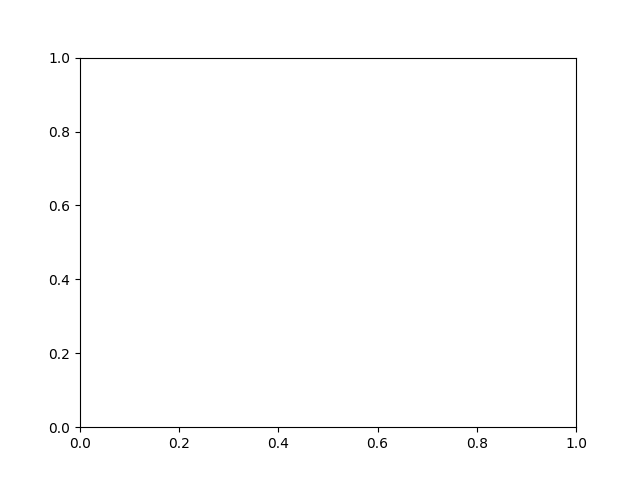

In [32]:
## 答案
points, dis = TSPGenerator(20)
paths = aco(8, 2, 2.5, 0.7, 1, 500, dis)
PlotTSP()(points, paths)